In [8]:
using CSV
using DataFrames
using CairoMakie
# Read the CSV file
df = CSV.File("Z_GR_NPHI_RHOB_CALI.txt",delim=',', ignorerepeated=true) |> DataFrame

# Convert columns
z = df[:, 1] .* 0.0003048  # Convert to kilometers
γ = df[:, 2]
ϕ = df[:, 3]
δ = df[:, 4]
cali = df[:, 5]
n = length(γ)

3201

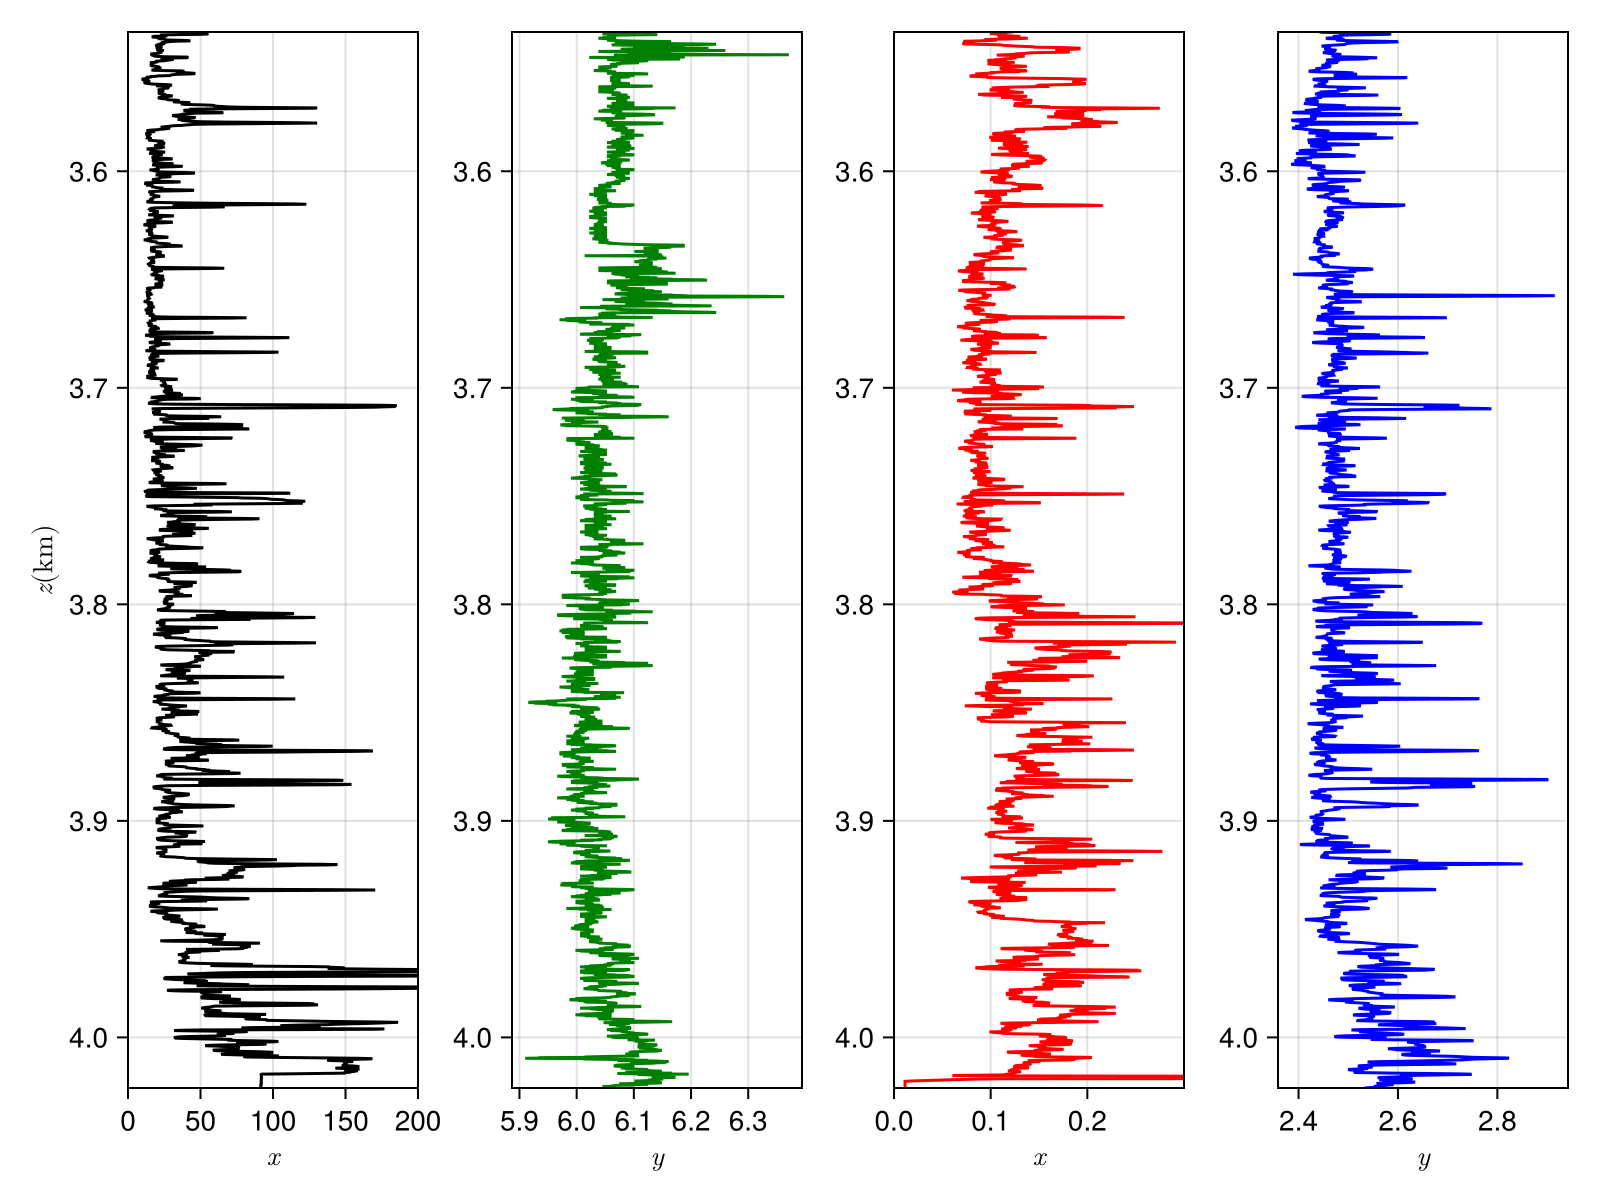

In [9]:
fig = Figure(size=(800, 600))
ax1 = Axis(fig[1, 1], xlabel=L"x", ylabel=L"z\text{(km)}")
ax2 = Axis(fig[1, 2], xlabel=L"y")
ax3 = Axis(fig[1, 3], xlabel=L"x")
ax4 = Axis(fig[1, 4], xlabel=L"y")

lines!(ax1, γ,   z, color=:black)
xlims!(ax1, 0, 200)
ylims!(ax1, maximum(z), minimum(z))

lines!(ax2, cali, z, color=:green)
ylims!(ax2, maximum(z), minimum(z))

lines!(ax3, ϕ, z, color=:red)
xlims!(ax3, 0, 0.3)
ylims!(ax3, maximum(z), minimum(z))

lines!(ax4, δ, z, color=:blue)
ylims!(ax4, maximum(z), minimum(z))

fig

**Prior marginal data PDF**

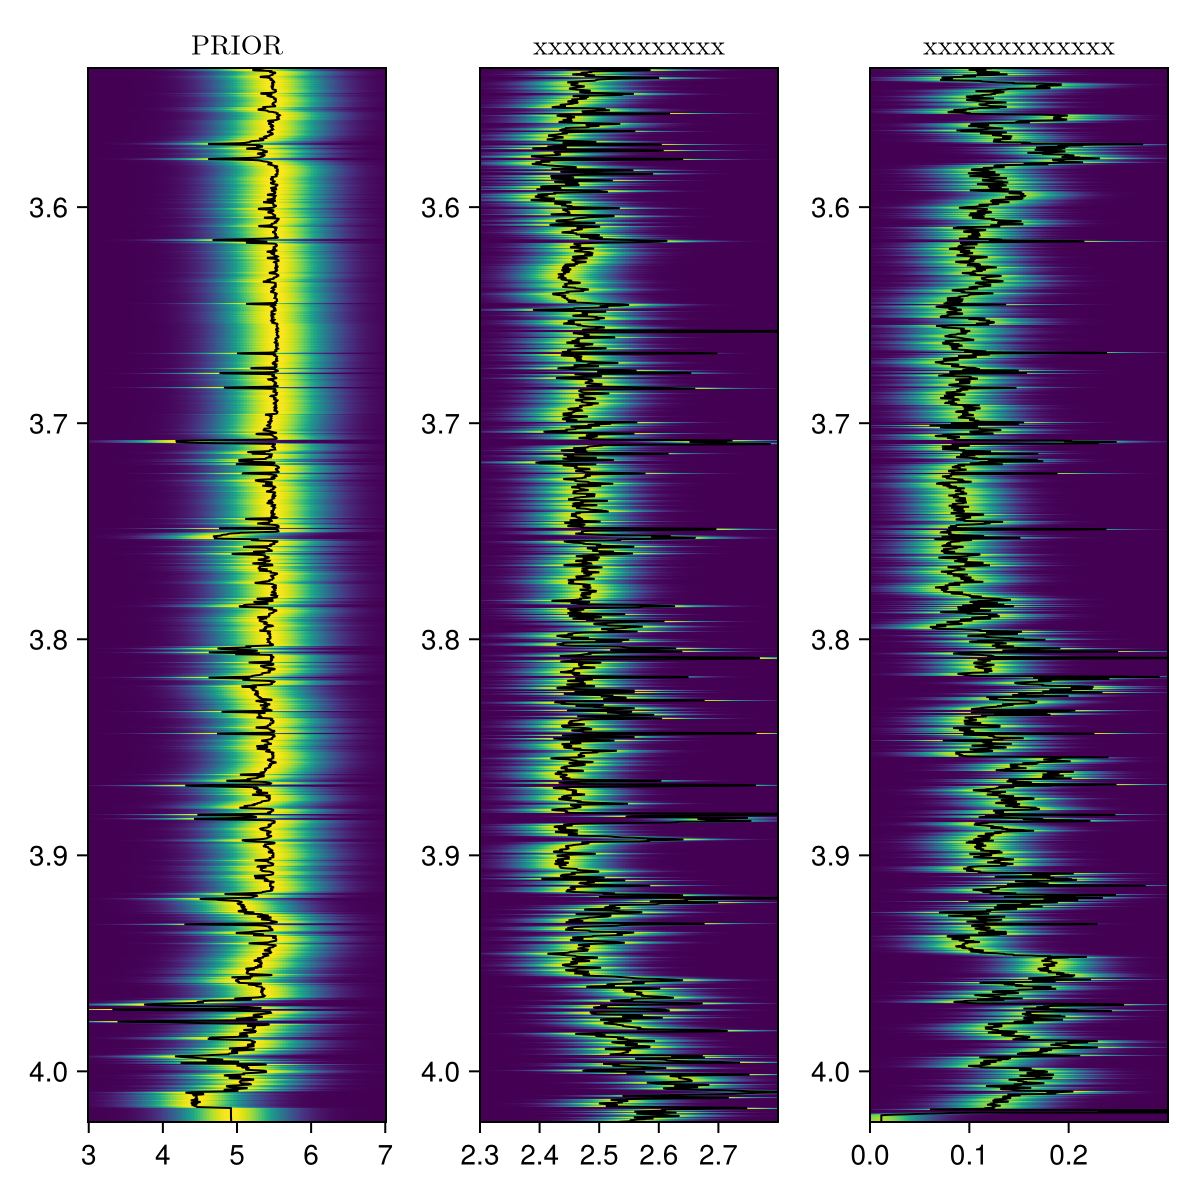

In [10]:
σ = 0.5
v̄ = 5.654 .- 0.008 .* γ
n_x = 200
v_maxtrix = zeros(n, n_x)
v_x = LinRange(3, 7, n_x)
for i in 1:n
    v_maxtrix[i, :] .= v_x
end
g_v = 1/(σ * √(2π)) .* exp.(-0.5*(v_maxtrix.-v̄).^2 ./σ^2);


# compute dispersion
cmax = 8 # max allowed caliper
cref = 6 # reference caliper
a_delta = 0.05 #minimum uncertainty
a_phi = 0.03
b_delta = LinRange(0.04, 0.05, length(cali))
b_phi = LinRange(0.05, 0.06, length(cali))
σ_delta = a_delta .+ (cali .- cref)/(cmax-cref) .* b_delta
σ_phi = a_phi .+ (cali .- cref)/(cmax-cref) .* b_phi

σ_delta_maxtrix = zeros(n, n_x)
σ_phi_maxtrix = zeros(n, n_x)
delta_x = LinRange(2.3, 2.8, n_x)
phi_x = LinRange(0, 0.3, n_x)
for i in 1:n
    σ_delta_maxtrix[i, :] .= delta_x
    σ_phi_maxtrix[i, :] .= phi_x
end

# # g_delta
g_delta = 1 ./(σ_delta * √(2π)) .* exp.(-0.5*(σ_delta_maxtrix.-δ).^2 ./σ_delta.^2);
g_phi = 1 ./(σ_phi * √(2π)) .* exp.(-0.5*(σ_phi_maxtrix.-ϕ).^2 ./σ_phi.^2);

fig = Figure(size=(600, 600))
ax5 = Axis(fig[1,1], yreversed=true, title=L"\text{PRIOR}")
hm=heatmap!(ax5, v_x, z, g_v')
lines!(ax5, v̄, z, linewidth=1, color=:black)

ax1 = Axis(fig[1,2], yreversed=true, title=L"\text{xxxxxxxxxxxxx}")
hm=heatmap!(ax1, delta_x, z, g_delta')
xlims!(ax1, 2.3, 2.8)
lines!(ax1, δ, z, linewidth=1, color=:black)

ax2 = Axis(fig[1,3], yreversed=true, title=L"\text{xxxxxxxxxxxxx}")
hm=heatmap!(ax2, phi_x, z, g_phi')
xlims!(ax2, 0, 0.3)
lines!(ax2, ϕ, z, linewidth=1, color=:black)
fig

At the depth of 3.7947 km:


In [31]:
# Example arrays for v, delta, and phi
v = LinRange(3.0, 6.0, 100)    # Example range for v
delta = LinRange(2.0, 3.0, 100)  # Example range for delta
phi = LinRange(0.1, 0.4, 100)  # Example range for phi

# Example marginal densities (assuming Gaussian shape, for demonstration)
g_v_marginal = exp.(-0.5 * ((v .- 4.5) ./ 0.3).^2) / (0.3 * sqrt(2 * π))
g_delta_marginal = exp.(-0.5 * ((delta .- 2.5) ./ 0.1).^2) / (0.1 * sqrt(2 * π))
g_phi_marginal = exp.(-0.5 * ((phi .- 0.25) ./ 0.05).^2) / (0.05 * sqrt(2 * π))



# Display dimensions of the joint density
# println("Dimensions of g_joint: ", size(g_joint))

100-element Vector{Float64}:
 0.08863696823876023
 0.10611576850575223
 0.12657552857165544
 0.1504265069741866
 0.1781163502683209
 0.21012997044300424
 0.24698865583042232
 0.2892482959526842
 0.3374966037324454
 0.39234922571494896
 ⋮
 0.33749660373244417
 0.2892482959526836
 0.24698865583042176
 0.21012997044300377
 0.17811635026832068
 0.1504265069741862
 0.1265755285716551
 0.10611576850575194
 0.08863696823876

In [32]:
v_grid

500×500×500 LazyGrids.GridAV{Float64, 1, 3}:
[:, :, 1] =
 3.81773e-6  3.81773e-6  3.81773e-6  …  3.81773e-6  3.81773e-6  3.81773e-6
 4.1325e-6   4.1325e-6   4.1325e-6      4.1325e-6   4.1325e-6   4.1325e-6
 4.47208e-6  4.47208e-6  4.47208e-6     4.47208e-6  4.47208e-6  4.47208e-6
 4.83831e-6  4.83831e-6  4.83831e-6     4.83831e-6  4.83831e-6  4.83831e-6
 5.23319e-6  5.23319e-6  5.23319e-6     5.23319e-6  5.23319e-6  5.23319e-6
 5.65884e-6  5.65884e-6  5.65884e-6  …  5.65884e-6  5.65884e-6  5.65884e-6
 6.11754e-6  6.11754e-6  6.11754e-6     6.11754e-6  6.11754e-6  6.11754e-6
 6.61172e-6  6.61172e-6  6.61172e-6     6.61172e-6  6.61172e-6  6.61172e-6
 7.14399e-6  7.14399e-6  7.14399e-6     7.14399e-6  7.14399e-6  7.14399e-6
 7.71712e-6  7.71712e-6  7.71712e-6     7.71712e-6  7.71712e-6  7.71712e-6
 ⋮                                   ⋱                          
 0.0111671   0.0111671   0.0111671      0.0111671   0.0111671   0.0111671
 0.0106546   0.0106546   0.0106546      0.0106546   0.0

In [33]:
index = 1600
@show  z[index]
g_v_marginal = g_v[index, :]
g_delta_marginal = g_delta[index, :]
g_phi_marginal = g_phi[index, :]

fig = Figure(size=(700, 700))
ax1 = Axis(fig[1,1])
ax2 = Axis(fig[2,1])
ax3 = Axis(fig[3,1])
lines!(ax1, v_x, g_v_marginal)
lines!(ax2, delta_x, g_delta_marginal)
lines!(ax3, phi_x, g_phi_marginal)
fig


z[index] = 3.7796724


In [34]:
using LazyGrids

# Create a 3D grid for v, delta, and phi
v_grid, delta_grid, phi_grid = ndgrid(g_v_marginal, g_delta_marginal, g_phi_marginal)

# Calculate the joint density as the product of the marginals
g_joint = v_grid .* delta_grid .* phi_grid



200×200×200 Array{Float64, 3}:
[:, :, 1] =
 6.04851e-9  7.13148e-9  8.38756e-9  9.84048e-9  …  9.41038e-16  6.79568e-16
 7.37422e-9  8.69455e-9  1.02259e-8  1.19973e-8     1.14729e-15  8.28514e-16
 8.97597e-9  1.05831e-8  1.24471e-8  1.46032e-8     1.3965e-15   1.00848e-15
 1.0908e-8   1.2861e-8   1.51263e-8  1.77465e-8     1.69708e-15  1.22554e-15
 1.32345e-8  1.56041e-8  1.83524e-8  2.15315e-8     2.05904e-15  1.48693e-15
 1.60312e-8  1.89016e-8  2.22307e-8  2.60816e-8  …  2.49416e-15  1.80115e-15
 1.93876e-8  2.28589e-8  2.68851e-8  3.15422e-8     3.01636e-15  2.17825e-15
 2.34089e-8  2.76002e-8  3.24614e-8  3.80845e-8     3.64199e-15  2.63005e-15
 2.82185e-8  3.3271e-8   3.91311e-8  4.59095e-8     4.39029e-15  3.17043e-15
 3.39615e-8  4.00422e-8  4.70949e-8  5.52528e-8     5.28379e-15  3.81567e-15
 ⋮                                               ⋱               
 3.05512e-5  3.60213e-5  4.23658e-5  4.97045e-5     4.7532e-12   3.43251e-12
 2.73551e-5  3.22529e-5  3.79336e-5  4.45046

In [35]:
heatmap(g_joint[:,:,100])

In [36]:
delta_x

200-element LinRange{Float64, Int64}:
 2.3, 2.30251, 2.30503, 2.30754, 2.31005, …, 2.79246, 2.79497, 2.79749, 2.8

In [39]:
using GLMakie
GLMakie.activate!()
fig = Figure(size=(1200, 800), fontsize=26)
ax1 = Axis3(fig[1, 1]; aspect=:data, xlabel=L"x", ylabel=L"y", zlabel=L"z",title=L"\text{3D PDF: } f(x,y,z)")
hm=heatmap!(ax1, v_x, delta_x, g_joint[:,:,40], transformation=(:xy, phi_x[40]), alpha=0.5)
hm=heatmap!(ax1, delta_x, phi_x, g_joint[40,:,:], transformation=(:yz, v_x[40]), alpha=0.5)
heatmap!(ax1, delta_x, phi_x, g_joint[90,:,:], transformation=(:yz, v_x[80]), alpha=0.5)
heatmap!(ax1, delta_x, phi_x, g_joint[160,:,:], transformation=(:yz, v_x[160]), alpha=0.5)
heatmap!(ax1, delta_x, phi_x, g_joint[100,:,:], transformation=(:yz, v_x[100]), alpha=0.5)

# heatmap!(ax1, x, z, F[:,80,:], transformation=(:xz, y[80]), alpha=0.5)
# heatmap!(ax1, y, z, F[80,:,:], transformation=(:yz, x[80]), alpha=0.5)
# Colorbar(fig[1, 2], hm; width=15, ticksize=15, tickalign=1, height=Relative(0.5))
fig 

In [38]:
using GLMakie

GLMakie.activate!()

# Create the figure
fig = Figure(size=(1200, 800), fontsize=26)

# Create a 3D axis
ax1 = Axis3(fig[1, 1]; aspect=:data, 
    xlabel=L"x", ylabel=L"y", zlabel=L"z", 
    title=L"\text{3D PDF: } f(v, \delta, \phi)")

# Define the 2D slices of the joint PDF at different indices of v_x
slice_indices = [100, 200, 300, 400]

# Plot 2D heatmaps with transformations on the 3D axis
for i in slice_indices
    heatmap!(ax1, delta_x, phi_x, g_joint[:, :, i]; 
        transformation=(:yz, v_x[i]), alpha=0.5, colormap=:viridis)
end

# Display the figure
fig


BoundsError: BoundsError: attempt to access 200×200×200 Array{Float64, 3} at index [1:200, 1:200, 300]